In [12]:
# egrep.py 
import sys, re
# sys.argv is the list of command-line arguments 
# sys.argv[0] is the name of the program itself 
# sys.argv[1] will be the regex specified at the command line 
regex = sys.argv[1]
# for every line passed into the script 
for line in sys.stdin:    
# if it matches the regex, write it to stdout    
    if re.search(regex, line):        
        sys.stdout.write(line)

In [13]:
# line_count.py 
import sys
count = 0 
for line in sys.stdin:    
    count += 1
# print goes to sys.stdout print count 

In [29]:
type emma.txt | python egrep.py "[0-9]" | python line_count.py 

SyntaxError: invalid syntax (<ipython-input-29-4942ed5dd2bd>, line 1)

In [11]:
# most_common_words.py
import sys
from collections import Counter
# pass in number of words as first argument
try:
    num_words = int(sys.argv[1])
except:
    print ("usage: most_common_words.py num_words")
    sys.exit(1) # non-zero exit code indicates error

counter = Counter(word.lower() # lowercase words
                  for line in sys.stdin #
                  for word in line.strip().split() # split on spaces
                  if word) # skip empty 'words'

for word, count in counter.most_common(num_words):
    sys.stdout.write(str(count))
    sys.stdout.write("\t")
    sys.stdout.write(word)
    sys.stdout.write("\n")

usage: most_common_words.py num_words


SystemExit: 1

In [1]:
C:\DataScience>type the_bible.txt | python most_common_words.py 10

SyntaxError: unexpected character after line continuation character (<ipython-input-1-e47ea8d035ea>, line 1)

In [31]:
# 'r' means read-only
file_for_reading = open('emma.txt', 'r')

In [16]:
# 'w' is write -- will destroy the file if it already exists!
file_for_writing = open('writing_file.txt', 'w')

In [17]:
# 'a' is append -- for adding to the end of the file
file_for_appending = open('appending_file.txt', 'a')

In [18]:
# don't forget to close your files when you're done
file_for_writing.close()

In [34]:
with open('emma.txt','r') as f:
    data = function_that_gets_data_from(f)
# at this point f has already been closed, so don't try to use it
process(data)

NameError: name 'function_that_gets_data_from' is not defined

In [3]:
import re
starts_with_hash = 0
with open('emma.txt','r') as f:
    for line in f: # look at each line in the file
        if re.match("^#",line): # use a regex to see if it starts with '#'
            starts_with_hash += 1 # if it does, add 1 to the count

In [35]:
starts_with_hash

0

In [38]:
def get_domain(email_address):
    """split on '@' and return the last piece"""
    return email_address.lower().split("@")[-1]
with open('email_addresses.txt', 'r') as f:
    domain_counts = Counter(get_domain(line.strip())
                            for line in f
                            if "@" in line)

FileNotFoundError: [Errno 2] No such file or directory: 'email_addresses.txt'

In [13]:
import csv
with open('tab_delimited_stock_prices.txt', 'rt') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        date = row[0]
        symbol = row[1]
        closing_price = float(row[2])
        process(date, symbol, closing_price)

IndexError: list index out of range

In [44]:
with open('colon_delimited_stock_prices.txt', 'rb') as f:
    reader = csv.DictReader(f, delimiter=':')
    for row in reader:
        date = row["date"]
        symbol = row["symbol"]
        closing_price = float(row["closing_price"])
        process(date, symbol, closing_price)

FileNotFoundError: [Errno 2] No such file or directory: 'colon_delimited_stock_prices.txt'

In [17]:
import csv
today_prices = { 'AAPL' : 90.91, 'MSFT' : 41.68, 'FB' : 64.5 }
with open('comma_delimited_stock_prices.txt','w') as f:
    writer = csv.writer(f, delimiter=',')
    for stock, price in today_prices.items():
        writer.writerow([stock, price])

today_prices

{'AAPL': 90.91, 'MSFT': 41.68, 'FB': 64.5}

In [18]:
results = [["test1", "success", "Monday"],
 ["test2", "success, kind of", "Tuesday"],
 ["test3", "failure, kind of", "Wednesday"],
 ["test4", "failure, utter", "Thursday"]]
# don't do this!
with open('bad_csv.txt', 'w') as f:
    for row in results:
        f.write(",".join(map(str, row))) # might have too many commas in it!
        f.write("\n") # row might have newlines as well!

<html>
 <head>
    <title>A web page</title>
 </head>
 <body>
    <p id="author">Joel Grus</p>
    <p id="subject">Data Science</p>
 </body>
</html>

pip install html5lib

pip install beautifulsoup4

In [20]:
from bs4 import BeautifulSoup
import requests
html = requests.get("http://www.example.com").text
soup = BeautifulSoup(html, 'html5lib')

In [65]:
first_paragraph = soup.find('p') # or just soup.p
first_paragraph

<p>This domain is established to be used for illustrative examples in documents. You may use this
    domain in examples without prior coordination or asking for permission.</p>

In [64]:
first_paragraph_text = soup.p.text
first_paragraph_words = soup.p.text.split()

In [21]:
first_paragraph_id = soup.p['id'] # raises KeyError if no 'id'
first_paragraph_id2 = soup.p.get('id') # returns None if no 'id'

KeyError: 'id'

In [22]:
all_paragraphs = soup.find_all('p') # or just soup('p')
paragraphs_with_ids = [p for p in soup('p') if p.get('id')]

In [23]:
important_paragraphs = soup('p', {'class' : 'important'})
important_paragraphs2 = soup('p', 'important')
important_paragraphs3 = [p for p in soup('p')
                         if 'important' in p.get('class', [])]

In [71]:
# warning, will return the same span multiple times
# if it sits inside multiple divs
# be more clever if that's the case

In [72]:
spans_inside_divs = [span
                     for div in soup('div') # for each <div> on the page
                     for span in div('span')] # find each <span> inside it

In [87]:
# you don't have to split the url like this unless it needs to fit in a book
url = "http://shop.oreilly.com/category/browse-subjects/" + \
      "data.do?sortby=publicationDate&page=1"
soup = BeautifulSoup(requests.get(url).text, 'html5lib')

<td class="thumbtext">
 <div class="thumbcontainer">
  <div class="thumbdiv">
   <a href="/product/9781118903407.do">
    <img src="..."/>
   </a>
  </div>
 </div>
<div class="widthchange">
  <div class="thumbheader">
   <a href="/product/9781118903407.do">Getting a Big Data Job For Dummies</a>
  </div>
  <div class="AuthorName">By Jason Williamson</div>
  <span class="directorydate"> December 2014 </span>
  <div style="clear:both;">
   <div id="146350">
    <span class="pricelabel">
                            Ebook:
                            <span class="price">&nbsp;$29.99</span>
    </span>
   </div>
  </div>
 </div>
</td>

In [24]:
tds = soup('td', 'thumbtext')
print(len(tds))

0


In [25]:
def is_video(td):
    """it's a video if it has exactly one pricelabel, and if Scraping the Web | 111 Grus, Joel. Data Science from Scratch : First Principles with Python, O'Reilly Media, Incorporated, 2015. ProQuest Ebook Central,
    http://ebookcentral.proquest.com/lib/unt/detail.action?docID=2025407.
    Created from unt on 2019-01-26 01:39:23. Copyright © 2015. O'Reilly Media, Incorporated. All rights reserved.
    the stripped text inside that pricelabel starts with 'Video'"""
    pricelabels = td('span', 'pricelabel')
    return (len(pricelabels) == 1 and
    pricelabels[0].text.strip().startswith("Video"))
print(len([td for td in tds if not is_video(td)]))
# 21 for me, might be different for you

0


In [26]:
title = td.find("div", "thumbheader").a.text

NameError: name 'td' is not defined

In [27]:
author_name = td.find('div', 'AuthorName').text
authors = [x.strip() for x in re.sub("^By ", "", author_name).split(",")]

NameError: name 'td' is not defined

In [28]:
isbn_link = td.find("div", "thumbheader").a.get("href")

NameError: name 'td' is not defined

In [29]:
# re.match captures the part of the regex in parentheses
isbn = re.match("/product/(.*)\.do", isbn_link).group(1)

NameError: name 'isbn_link' is not defined

In [30]:
date = td.find("span", "directorydate").text.strip()

NameError: name 'td' is not defined

In [31]:
def book_info(td):
    """given a BeautifulSoup <td> Tag representing a book,
    extract the book's details and return a dict"""
    title = td.find("div", "thumbheader").a.text
    by_author = td.find('div', 'AuthorName').text
    authors = [x.strip() for x in re.sub("^By ", "", by_author).split(",")]
    isbn_link = td.find("div", "thumbheader").a.get("href")
    isbn = re.match("/product/(.*)\.do", isbn_link).groups()[0]
    date = td.find("span", "directorydate").text.strip()
    return {
           "title" : title,
           "authors" : authors,
           "isbn" : isbn,
           "date" : date
                 }

In [32]:
from bs4 import BeautifulSoup
import requests
from time import sleep
base_url = "http://shop.oreilly.com/category/browse-subjects/" + \
            "data.do?sortby=publicationDate&page="
books = []

NUM_PAGES = 31 # at the time of writing, probably more by now

for page_num in range(1, NUM_PAGES + 1):
    print "souping page", page_num, ",", len(books), " found so far"
    url = base_url + str(page_num)
    soup = BeautifulSoup(requests.get(url).text, 'html5lib')
    for td in soup('td', 'thumbtext'):
        if not is_video(td):
            books.append(book_info(td))
# now be a good citizen and respect the robots.txt!
sleep(30)


SyntaxError: invalid syntax (<ipython-input-32-bdf54835185e>, line 11)

In [37]:
def get_year(book):
    """book["date"] looks like 'November 2014' so we need to
    split on the space and then take the second piece"""
    return int(book["date"].split()[1])
# 2014 is the last complete year of data (when I ran this)
year_counts = Counter(get_year(book) for book in books
                      if get_year(book) <= 2014)
import matplotlib.pyplot as plt
years = sorted(year_counts)
book_counts = [year_counts[year] for year in years]
plt.plot(years, book_counts)
plt.ylabel("# of data books")
plt.title("Data is Big!")
plt.show()

NameError: name 'Counter' is not defined

In [34]:
{ "title" : "Data Science Book",
 "author" : "Joel Grus",
 "publicationYear" : 2014,
 "topics" : [ "data", "science", "data science"] }

{'title': 'Data Science Book',
 'author': 'Joel Grus',
 'publicationYear': 2014,
 'topics': ['data', 'science', 'data science']}

In [35]:
import json
serialized = """{ "title" : "Data Science Book",
                  "author" : "Joel Grus",
                  "publicationYear" : 2014,
                  "topics" : [ "data", "science", "data science"] }"""
# parse the JSON to create a Python dict
deserialized = json.loads(serialized)
if "data science" in deserialized["topics"]:
    print(deserialized)


{'title': 'Data Science Book', 'author': 'Joel Grus', 'publicationYear': 2014, 'topics': ['data', 'science', 'data science']}


In [36]:
import requests, json
endpoint = "https://api.github.com/users/joelgrus/repos"
repos = json.loads(requests.get(endpoint).text)

pip install python-dateutil

In [40]:
from dateutil.parser import parse
from collections import Counter
dates = [parse(repo["created_at"]) for repo in repos]
month_counts = Counter(date.month for date in dates)
weekday_counts = Counter(date.weekday() for date in dates)

In [42]:
last_5_repositories = sorted(repos,
                             key=lambda r: r["created_at"],
                             reverse=True)[:5]
last_5_languages = [repo["language"]
                    for repo in last_5_repositories]

In [43]:
from twython import Twython
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET)
# search for tweets containing the phrase "data science"
for status in twitter.search(q='"data science"')["statuses"]:
    user = status["user"]["screen_name"].encode('utf-8')
    text = status["text"].encode('utf-8')
    print(user, ":", text)
    print()

NameError: name 'CONSUMER_KEY' is not defined

In [26]:
from twython import TwythonStreamer
# appending data to a global variable is pretty poor form
# but it makes the example much simpler
tweets = []
class MyStreamer(TwythonStreamer):
    """our own subclass of TwythonStreamer that specifies
    how to interact with the stream"""
    def on_success(self, data):
        """what do we do when twitter sends us data?
        here data will be a Python dict representing a tweet"""
        # only want to collect English-language twee
        if data['lang'] == 'en':
            tweets.append(data)
            print("received tweet #", len(tweets))
            # stop when we've collected enough
            if len(tweets) >= 1000:
                self.disconnect()
def on_error(self, status_code, data):
    print(status_code, data)
    self.disconnect()


In [45]:
stream = MyStreamer(CONSUMER_KEY, CONSUMER_SECRET,
                    ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
# starts consuming public statuses that contain the keyword 'data'
stream.statuses.filter(track='data')
# if instead we wanted to start consuming a sample of *all* public statuses
# stream.statuses.sample()


NameError: name 'MyStreamer' is not defined

In [46]:
top_hashtags = Counter(hashtag['text'].lower()
                       for tweet in tweets
                       for hashtag in tweet["entities"]["hashtags"])
print(top_hashtags.most_common(5))


NameError: name 'tweets' is not defined

23

In [28]:
users = [[0, "Hero", 0],
 [1, "Dunn", 2],
 [2, "Sue", 3],
 [3, "Chi", 3]]

In [29]:
users

[[0, 'Hero', 0], [1, 'Dunn', 2], [2, 'Sue', 3], [3, 'Chi', 3]]

CREATE TABLE users (
 user_id INT NOT NULL,
 name VARCHAR(200),
 num_friends INT);

In [6]:
from IPython.core.debugger import set_trace
from collections import defaultdict

In [3]:
class Table:
    def __init__(self, columns):
        self.columns = columns
        self.rows = []
        
    def __repr__(self):
        """pretty representation of the table: columns then rows"""
        return str(self.columns) + "\n" + "\n".join(map(str, self.rows))
    
    def insert(self, row_values):
        if len(row_values) != len(self.columns):
            raise TypeError("wrong number of elements")
        row_dict = dict(zip(self.columns, row_values))
        self.rows.append(row_dict)
        
    def update(self, updates, predicate):
        for row in self.rows:
            if predicate(row):
                for column, new_value in updates.items():
                    row[column] = new_value
                    
    def delete(self, predicate=lambda row: True):
        """delete all rows matching predicate
        or all rows if no predicate supplied"""
        self.rows = [row for row in self.rows if not(predicate(row))]
        
    def select(self, keep_columns=None, additional_columns=None):
        if keep_columns is None: # if no columns specified,
            keep_columns = self.columns # return all columns
        if additional_columns is None:
            additional_columns = {}
        # new table for results
        result_table = Table(keep_columns + additional_columns.keys())
        for row in self.rows:
            new_row = [row[column] for column in keep_columns]
            for column_name, calculation in additional_columns.iteritems():
                new_row.append(calculation(row))
            result_table.insert(new_row)
            set_trace()
        return result_table
    
    def where(self, predicate=lambda row: True):
        """return only the rows that satisfy the supplied predicate"""
        where_table = Table(self.columns)
        where_table.rows = filter(predicate, self.rows)
        return where_table
    
    def limit(self, num_rows):
        """return only the first num_rows rows"""
        limit_table = Table(self.columns)
        limit_table.rows = self.rows[:num_rows]
        return limit_table
    
    def group_by(self, group_by_columns, aggregates, having=None):
        grouped_rows = defaultdict(list)
        # populate groups
        for row in self.rows:
            key = tuple(row[column] for column in group_by_columns)
            grouped_rows[key].append(row)
        # result table consists of group_by columns and aggregates
        result_table = Table(group_by_columns + aggregates.keys())
        for key, rows in grouped_rows.iteritems():
            if having is None or having(rows):
                new_row = list(key)
                for aggregate_name, aggregate_fn in aggregates.items():
                    new_row.append(aggregate_fn(rows))
                result_table.insert(new_row)
        return result_table
    
    def order_by(self, order):
        new_table = self.select() # make a copy
        new_table.rows.sort(key=order)
        return new_table
    
    def join(self, other_table, left_join=False):
        join_on_columns = [c for c in self.columns # columns in
                           if c in other_table.columns] # both tables
        additional_columns = [c for c in other_table.columns # columns only
                              if c not in join_on_columns] # in right table
        # all columns from left table + additional_columns from right table
        join_table = Table(self.columns + additional_columns)
        for row in self.rows:
            def is_join(other_row):
                return all(other_row[c] == row[c] for c in join_on_columns)
            other_rows = other_table.where(is_join).rows
        # each other row that matches this one produces a result row
            for other_row in other_rows:
                join_table.insert([row[c] for c in self.columns] +
                                  [other_row[c] for c in additional_columns])
        # if no rows match and it's a left join, output with Nones
            if left_join and not other_rows:
                join_table.insert([row[c] for c in self.columns] +
                                  [None for c in additional_columns])
        return join_table  

In [4]:
users = Table(["user_id", "name", "num_friends"])
users.insert([0, "Hero", 0])
users.insert([1, "Dunn", 2])
users.insert([2, "Sue", 3])
users.insert([3, "Chi", 3])
users.insert([4, "Thor", 3])
users.insert([5, "Clive", 2])
users.insert([6, "Hicks", 3])
users.insert([7, "Devin", 2])
users.insert([8, "Kate", 2])
users.insert([9, "Klein", 3])
users.insert([10, "Jen", 1])

In [5]:
users

['user_id', 'name', 'num_friends']
{'user_id': 0, 'name': 'Hero', 'num_friends': 0}
{'user_id': 1, 'name': 'Dunn', 'num_friends': 2}
{'user_id': 2, 'name': 'Sue', 'num_friends': 3}
{'user_id': 3, 'name': 'Chi', 'num_friends': 3}
{'user_id': 4, 'name': 'Thor', 'num_friends': 3}
{'user_id': 5, 'name': 'Clive', 'num_friends': 2}
{'user_id': 6, 'name': 'Hicks', 'num_friends': 3}
{'user_id': 7, 'name': 'Devin', 'num_friends': 2}
{'user_id': 8, 'name': 'Kate', 'num_friends': 2}
{'user_id': 9, 'name': 'Klein', 'num_friends': 3}
{'user_id': 10, 'name': 'Jen', 'num_friends': 1}

UPDATE users
SET num_friends = 3
WHERE user_id = 1;

In [33]:
users.update({'num_friends' : 3}, # set num_friends = 3
             lambda row: row['user_id'] == 1) # in rows where user_id == 1

AttributeError: 'dict' object has no attribute 'iteritems'

In [6]:
users.delete(lambda row: row["user_id"] == 1) # deletes rows with user_id == 1
users

['user_id', 'name', 'num_friends']
{'user_id': 0, 'name': 'Hero', 'num_friends': 0}
{'user_id': 2, 'name': 'Sue', 'num_friends': 3}
{'user_id': 3, 'name': 'Chi', 'num_friends': 3}
{'user_id': 4, 'name': 'Thor', 'num_friends': 3}
{'user_id': 5, 'name': 'Clive', 'num_friends': 2}
{'user_id': 6, 'name': 'Hicks', 'num_friends': 3}
{'user_id': 7, 'name': 'Devin', 'num_friends': 2}
{'user_id': 8, 'name': 'Kate', 'num_friends': 2}
{'user_id': 9, 'name': 'Klein', 'num_friends': 3}
{'user_id': 10, 'name': 'Jen', 'num_friends': 1}

In [ ]:
users.delete() # deletes every row

In [53]:
users

['user_id', 'name', 'num_friends']
{'user_id': 0, 'name': 'Hero', 'num_friends': 0}
{'user_id': 1, 'name': 'Dunn', 'num_friends': 2}
{'user_id': 2, 'name': 'Sue', 'num_friends': 3}
{'user_id': 3, 'name': 'Chi', 'num_friends': 3}
{'user_id': 4, 'name': 'Thor', 'num_friends': 3}
{'user_id': 5, 'name': 'Clive', 'num_friends': 2}
{'user_id': 6, 'name': 'Hicks', 'num_friends': 3}
{'user_id': 7, 'name': 'Devin', 'num_friends': 2}
{'user_id': 8, 'name': 'Kate', 'num_friends': 2}
{'user_id': 9, 'name': 'Klein', 'num_friends': 3}
{'user_id': 10, 'name': 'Jen', 'num_friends': 1}

SELECT * FROM users; -- get the entire contents
SELECT * FROM users LIMIT 2; -- get the first two rows
SELECT user_id FROM users; -- only get specific columns
SELECT user_id FROM users WHERE name = 'Dunn'; -- only get specific rows

SELECT LENGTH(name) AS name_length FROM users;

In [35]:
# SELECT * FROM users;
users.select()

TypeError: can only concatenate list (not "dict_keys") to list

In [54]:
# SELECT * FROM users LIMIT 2;
users.limit(2)

['user_id', 'name', 'num_friends']
{'user_id': 0, 'name': 'Hero', 'num_friends': 0}
{'user_id': 1, 'name': 'Dunn', 'num_friends': 2}

In [17]:
# SELECT user_id FROM users;
users.select(keep_columns=["user_id"])

NameError: name 'users' is not defined

In [36]:
# SELECT user_id FROM users WHERE name = 'Dunn';
users.where(lambda row: row["name"] == "Dunn") \
     .select(keep_columns=["user_id"])

TypeError: can only concatenate list (not "dict_keys") to list

In [58]:
# SELECT LENGTH(name) AS name_length FROM users;
def name_length(row): return len(row["name"])
users.select(keep_columns=[],
             additional_columns = { "name_length" : name_length })

TypeError: can only concatenate list (not "dict_keys") to list

SELECT LENGTH(name) as name_length,
MIN(user_id) AS min_user_id,
COUNT(*) AS num_users
FROM users
GROUP BY LENGTH(name);

SELECT LENGTH(name) as name_length,
MIN(user_id) AS min_user_id,
COUNT(*) AS num_users
FROM users
GROUP BY LENGTH(name);

SELECT SUBSTR(name, 1, 1) AS first_letter,
AVG(num_friends) AS avg_num_friends
FROM users
GROUP BY SUBSTR(name, 1, 1)
HAVING AVG(num_friends) > 1;

SELECT SUM(user_id) as user_id_sum
FROM users
WHERE user_id > 1;

In [60]:
def min_user_id(rows): return min(row["user_id"] for row in rows)
stats_by_length = users \
    .select(additional_columns={"name_length" : name_length}) \
    .group_by(group_by_columns=["name_length"],
        aggregates={ "min_user_id" : min_user_id,
                    "num_users" : len })

TypeError: can only concatenate list (not "dict_keys") to list

In [68]:
def first_letter_of_name(row):
    return row["name"][0] if row["name"] else ""

In [69]:
def average_num_friends(rows):
    return sum(row["num_friends"] for row in rows) / len(rows)

In [70]:
def enough_friends(rows):
    return average_num_friends(rows) > 1

In [19]:
avg_friends_by_letter = users \
    .select(additional_columns={'first_letter' : first_letter_of_name}) \
    .group_by(group_by_columns=['first_letter'],
              aggregates={ "avg_num_friends" : average_num_friends },
              having=enough_friends)

NameError: name 'users' is not defined

In [20]:
def sum_user_ids(rows): return sum(row["user_id"] for row in rows)

user_id_sum = users \
    .where(lambda row: row["user_id"] > 1) \
    .group_by(group_by_columns=[],
              aggregates={ "user_id_sum" : sum_user_ids })

NameError: name 'users' is not defined

SELECT * FROM users
ORDER BY name
LIMIT 2;

In [21]:
friendliest_letters = avg_friends_by_letter \
    .order_by(lambda row: -row["avg_num_friends"]) \
    .limit(4)

NameError: name 'avg_friends_by_letter' is not defined

CREATE TABLE user_interests (
    user_id INT NOT NULL,
    interest VARCHAR(100) NOT NULL
);

In [22]:
user_interests = Table(["user_id", "interest"])
user_interests.insert([0, "SQL"])
user_interests.insert([0, "NoSQL"])
user_interests.insert([2, "SQL"])
user_interests.insert([2, "MySQL"])

SELECT users.name
FROM users
JOIN user_interests
ON users.user_id = user_interests.user_id
WHERE user_interests.interest = 'SQL'

In [ ]:
SELECT users.id, COUNT(user_interests.interest) AS num_interests
FROM users
LEFT JOIN user_interests
ON users.user_id = user_interests.user_id

In [23]:
sql_users = users \
    .join(user_interests) \
    .where(lambda row: row["interest"] == "SQL") \
    .select(keep_columns=["name"])

NameError: name 'users' is not defined

In [92]:
def count_interests(rows):
    """counts how many rows have non-None interests"""
    return len([row for row in rows if row["interest"] is not None])

In [94]:
user_interest_counts = users \
    .join(user_interests, left_join=True) \
    .group_by(group_by_columns=["user_id"],
              aggregates={"num_interests" : count_interests })


AttributeError: 'Table' object has no attribute 'join'

SELECT MIN(user_id) AS min_user_id FROM
(SELECT user_id FROM user_interests WHERE interest = 'SQL') sql_interests;

In [98]:
likes_sql_user_ids = user_interests \
   .where(lambda row: row["interest"] == "SQL") \
   .select(keep_columns=['user_id'])
likes_sql_user_ids.group_by(group_by_columns=[],
                            aggregates={ "min_user_id" : min_user_id })

AttributeError: 'Table' object has no attribute 'where'

SELECT users.name
FROM users
JOIN user_interests
ON users.user_id = user_interests.user_id
WHERE user_interests.interest = 'SQL

In [99]:
user_interests \
   .where(lambda row: row["interest"] == "SQL") \
   .join(users) \
   .select(["name"])

AttributeError: 'Table' object has no attribute 'where'

In [100]:
user_interests \
    .join(users) \
    .where(lambda row: row["interest"] == "SQL") \
    .select(["name"])

AttributeError: 'Table' object has no attribute 'join'

class work

In [9]:
!pip install requests_html

In [13]:
from requests_html import HTMLSession

In [14]:
url = 'http://www.cleveland.com/metro/index.ssf/2017/12/case_western_reserve_university_president_barbara_snyders_base_salary_and_bonus_pay_tops_among_private_colleges_in_ohio.html'

In [15]:
r = HTMLSession().get(url)

In [16]:
element = r.html.find('#entryContent > ul:nth-child(7)')

In [17]:
element

[<Element 'ul' >]

In [18]:
print(element[0].text)

Grant Cornwell, College of Wooster (left in 2015): $911,651
Marvin Krislov, Oberlin College (left in 2016):  $829,913
Mark Roosevelt, Antioch College, (left in 2015): $507,672
Laurie Joyner, Wittenberg University (left in 2015): $463,504
Richard Giese, University of Mount Union (left in 2015): $453,800
Sean Decatur,Kenyon College: $451,698
Adam Weinberg, Denison University: $435,322
Daniel Dibiasio, Ohio Northern University: $414,716
Denvy Bowman, Capital University (left in 2016): $388,570
Anne Steele, Muskingum University (left in 2016): $384,233
Kathy Krendl, Otterbein University:  $378,035
Rockwell Jones, Ohio Wesleyan University: $366,625
Robert Helmer, Baldwin Wallace University: $365,616
Robert Huntington, Heidelberg University: $300,005
Lori Varlotta, Hiram College: $293,336
Joseph Bruno, Marietta College (left in 2016): $288,295
W. Richard Merriman Jr., University of Mount Union (started in June 2015): $221,761


In [19]:
import re
regex=",\s*([\w+\s*]+).*\$(\d+),(\d+)"
re.findall(regex, element[0].text)

[('College of Wooster ', '911', '651'),
 ('Oberlin College ', '829', '913'),
 ('Antioch College', '507', '672'),
 ('Wittenberg University ', '463', '504'),
 ('University of Mount Union ', '453', '800'),
 ('Kenyon College', '451', '698'),
 ('Denison University', '435', '322'),
 ('Ohio Northern University', '414', '716'),
 ('Capital University ', '388', '570'),
 ('Muskingum University ', '384', '233'),
 ('Otterbein University', '378', '035'),
 ('Ohio Wesleyan University', '366', '625'),
 ('Baldwin Wallace University', '365', '616'),
 ('Heidelberg University', '300', '005'),
 ('Hiram College', '293', '336'),
 ('Marietta College ', '288', '295'),
 ('University of Mount Union ', '221', '761')]

In [20]:
result=re.findall(regex, element[0].text)
mydict=dict()

In [21]:
for item in result: 
  mydict[item[0].strip()]=float(item[1]+item[2])/2000

In [22]:
mydict

{'College of Wooster': 455.8255,
 'Oberlin College': 414.9565,
 'Antioch College': 253.836,
 'Wittenberg University': 231.752,
 'University of Mount Union': 110.8805,
 'Kenyon College': 225.849,
 'Denison University': 217.661,
 'Ohio Northern University': 207.358,
 'Capital University': 194.285,
 'Muskingum University': 192.1165,
 'Otterbein University': 189.0175,
 'Ohio Wesleyan University': 183.3125,
 'Baldwin Wallace University': 182.808,
 'Heidelberg University': 150.0025,
 'Hiram College': 146.668,
 'Marietta College': 144.1475}

In [23]:
for k,v in mydict.items():
  print(f'{k}:{v}')

College of Wooster:455.8255
Oberlin College:414.9565
Antioch College:253.836
Wittenberg University:231.752
University of Mount Union:110.8805
Kenyon College:225.849
Denison University:217.661
Ohio Northern University:207.358
Capital University:194.285
Muskingum University:192.1165
Otterbein University:189.0175
Ohio Wesleyan University:183.3125
Baldwin Wallace University:182.808
Heidelberg University:150.0025
Hiram College:146.668
Marietta College:144.1475


In [24]:
mylist=list(mydict.items())

In [25]:
mylist.sort(key=lambda x:x[1], reverse=True)

In [26]:
mylist

[('College of Wooster', 455.8255),
 ('Oberlin College', 414.9565),
 ('Antioch College', 253.836),
 ('Wittenberg University', 231.752),
 ('Kenyon College', 225.849),
 ('Denison University', 217.661),
 ('Ohio Northern University', 207.358),
 ('Capital University', 194.285),
 ('Muskingum University', 192.1165),
 ('Otterbein University', 189.0175),
 ('Ohio Wesleyan University', 183.3125),
 ('Baldwin Wallace University', 182.808),
 ('Heidelberg University', 150.0025),
 ('Hiram College', 146.668),
 ('Marietta College', 144.1475),
 ('University of Mount Union', 110.8805)]

In [27]:
for i in mylist:
  print(i[0],':',i[1])

College of Wooster : 455.8255
Oberlin College : 414.9565
Antioch College : 253.836
Wittenberg University : 231.752
Kenyon College : 225.849
Denison University : 217.661
Ohio Northern University : 207.358
Capital University : 194.285
Muskingum University : 192.1165
Otterbein University : 189.0175
Ohio Wesleyan University : 183.3125
Baldwin Wallace University : 182.808
Heidelberg University : 150.0025
Hiram College : 146.668
Marietta College : 144.1475
University of Mount Union : 110.8805


In [28]:
colleges=[item[0] for item in mylist]; colleges

['College of Wooster',
 'Oberlin College',
 'Antioch College',
 'Wittenberg University',
 'Kenyon College',
 'Denison University',
 'Ohio Northern University',
 'Capital University',
 'Muskingum University',
 'Otterbein University',
 'Ohio Wesleyan University',
 'Baldwin Wallace University',
 'Heidelberg University',
 'Hiram College',
 'Marietta College',
 'University of Mount Union']

In [29]:
salary=[item[1] for item in mylist];salary

[455.8255,
 414.9565,
 253.836,
 231.752,
 225.849,
 217.661,
 207.358,
 194.285,
 192.1165,
 189.0175,
 183.3125,
 182.808,
 150.0025,
 146.668,
 144.1475,
 110.8805]

In [30]:
import matplotlib.pyplot as plt

<BarContainer object of 16 artists>

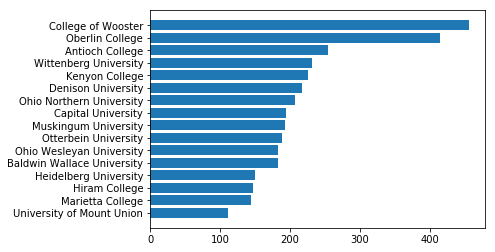

In [31]:
colleges.reverse()
salary.reverse()
plt.barh(colleges, salary)